<p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Table of Contents</b>
</p><br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
- [Data Set](#Data-Set)

-  [Problem](#Problem)

- [Libraries](#Libraries)

- [Read and Understand Data](#Read-and-Understand-data)

- [Data Preprocessing](#Data-Preprocessing)
    
- [Basic EDA](#EDA)    
    
- [Handling Missing Value](#Handling-missing-values)
    
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    
- [Insights based on EDA](#Insights-based-on-EDA)
  
- [Model Building](#Model-Building)

<br>


## Data Set
<br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
1. S.No. : Serial Number<br>
    
2. Name : Name of the car which includes Brand name and Model name<br>
    
3. Location : The location in which the car is being sold or is available for purchase Cities<br>
    
4. Year : Manufacturing year of the car<br>
    
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
    
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
    
7. Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
    
8. Owner : Type of ownership<br>
    
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg<br>
    
10. Engine : The displacement volume of the engine in CC.<br>
    
11. Power : The maximum power of the engine in bhp.<br>
    
12. Seats : The number of seats in the car.<br>
    
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
    
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)<br>
</p>

## Problem
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

- Does various predicating factors effect the price of the used car .?<br>
- What all  independent variables effect the pricing of used cars?<br>
- Does name of a car have any effect on  pricing of car.?<br>
- How does type of Transmission  effect  pricing?<br>
- Does Location in which the car being sold has any effect on the price?<br>
- Does kilometers_Driven,Year of manufacturing  have negative correlation with  price of the car?<br>
- Does Mileage ,Engine and Power have any effect on the pricing of the car?<br>
- How does number of seat ,Fuel type effect the pricing.?<br>
</p>

In [162]:
#!pip install missingno

# Libraries


In [163]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm

# 1. Data Collection

# Read and Understand data

In [164]:
#Reading the csv file  used car data.csv 
df=pd.read_csv('used_cars_data.csv')
cars=df.copy()
cars

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN


In [165]:
cars.shape  #Dataset have 7253 rows and 15 columns

(7253, 14)

In [166]:
# inspect data, print top 5 
cars.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [167]:
# bottom 5 rows:
cars.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,NaN


In [168]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [169]:
Null_Values=cars.isnull().sum().to_frame().sort_values(by=0,ascending=False)  #Finding Null Values in the dataset
Null_Values

,0
New_Price,6247
Price,1234
Seats,53
Engine,46
Power,46
Mileage,2
S.No.,0
Name,0
Location,0
Year,0


In [170]:
#Finding Unique Values
cars.nunique().sort_values(ascending=False)

S.No.                7253
Kilometers_Driven    3660
Name                 2041
Price                1373
New_Price             625
Mileage               450
Power                 386
Engine                150
Year                   23
Location               11
Seats                   9
Fuel_Type               5
Owner_Type              4
Transmission            2
dtype: int64

In [171]:
#Finding Missing Values Percentage
round(cars.isna().sum() / cars.isna().count() * 100,1).sort_values(ascending=False)

New_Price           86.10000
Price               17.00000
Seats                0.70000
Engine               0.60000
Power                0.60000
S.No.                0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.00000
dtype: float64

In [172]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<AxesSubplot:>

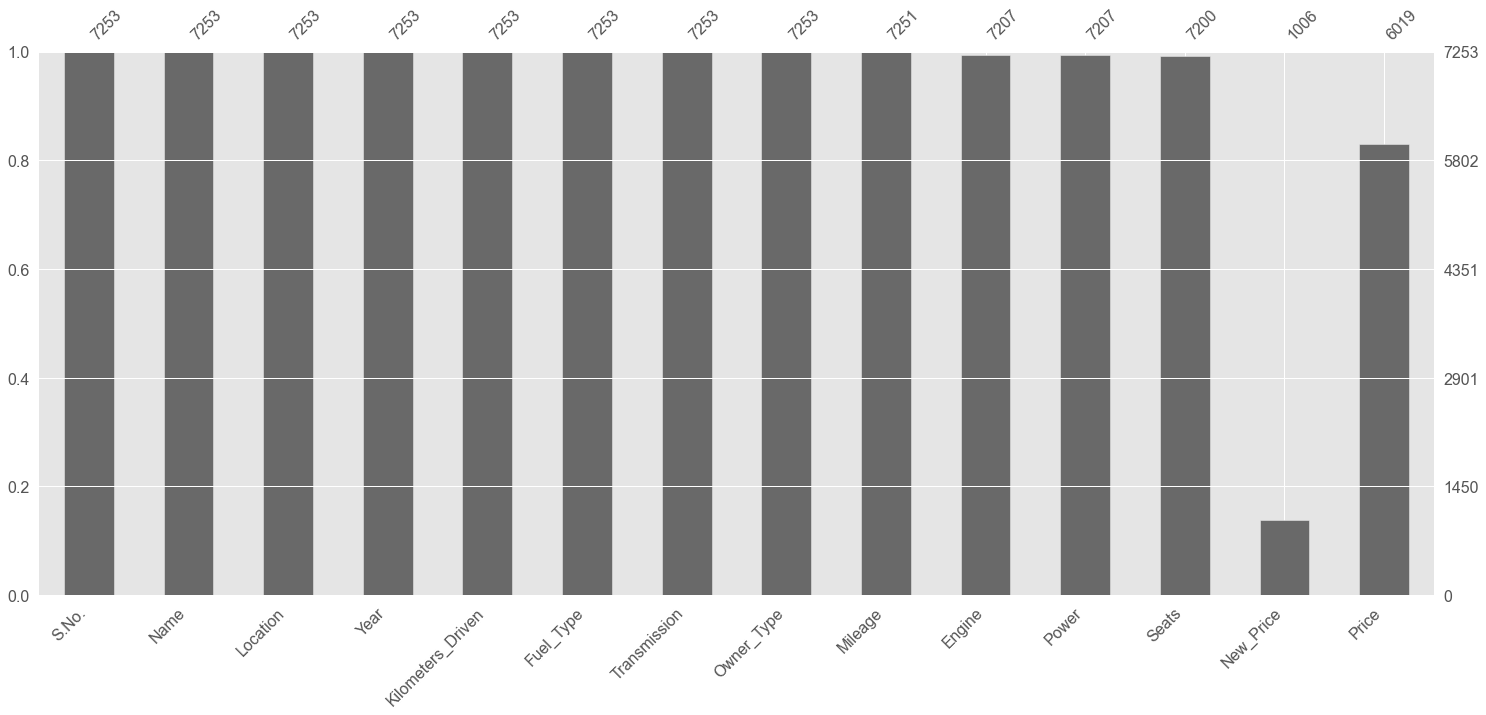

In [173]:
#Visualize missing values
msno.bar(cars)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b></p>
This preview  shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later.

-  **`New_Price`** has only 1006 values. 86 % values are missing

-  **`Price`**, which is a Target variable 17 % missing values.This needs to be analysed further.

-  **`Seats`** has only 53 values missing and number of seats can be one of key factor in deciding price.
-  **`Power`** and **`Engine`** has 46 missing values.

-  **`Mileage`** only has two values missing.

-  **`Mileage`,`Power`,`Engine`,`New_Price`** we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [174]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]

In [175]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("*" * 40)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
****************************************
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
****************************************
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
****************************************
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: Seats, dtype: int64
****************************************
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998  

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>  Observations</b></p>

 - Maximum car being sold have fuel type as Diesel.
 - Mumbai has highest numbers of car availabe for purchase.
 - 5204 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned.
 - Years of car ranges form 1996- 2015

In [176]:
cars.shape

(7253, 14)

# Data Preprocessing

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'S.No.'),
  Text(2, 0, 'Year'),
  Text(3, 0, 'Kilometers_Driven'),
  Text(4, 0, 'Seats'),
  Text(5, 0, 'Price')])

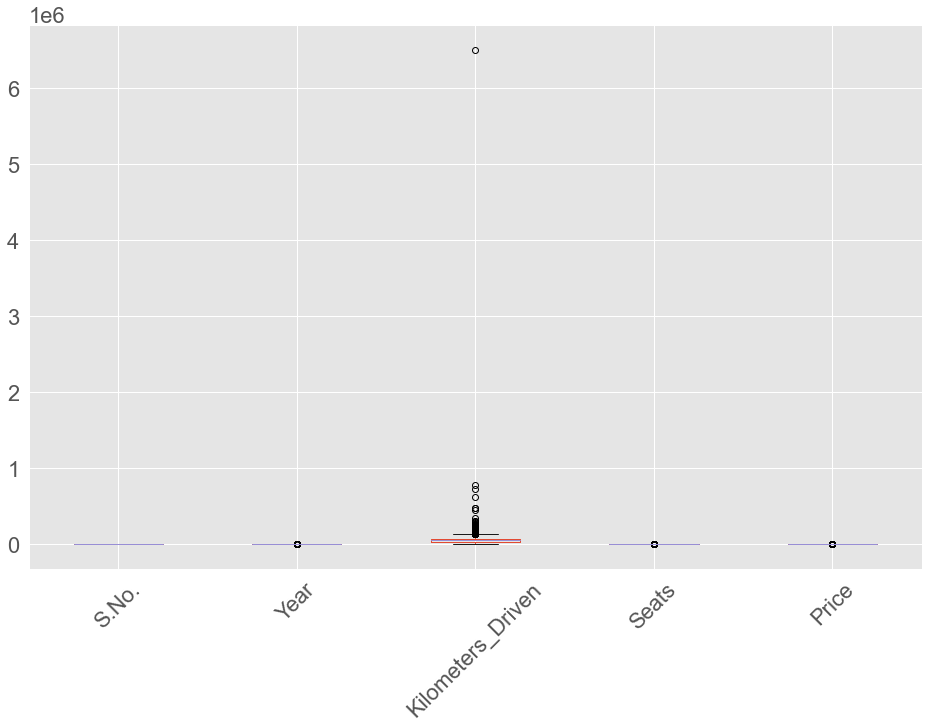

In [177]:
plt.figure(figsize=(16,10))
cars.boxplot()
plt.xticks(rotation=45)


### Processing Engine,Power ,Mileage columns

Datatype for Engine ,Power and Mileage must be a numerical value,But as per above analysis these are in object type.of unit assigned ,so checking the dataset below.

In [178]:
np.random.seed(15)
cars[['Engine','Power','Mileage']].sample(5)

,Engine,Power,Mileage
6694,1798 CC,177.46 bhp,14.67 kmpl
5146,2967 CC,241.4 bhp,12.07 kmpl
914,1968 CC,174.33 bhp,15.73 kmpl
861,1197 CC,81.83 bhp,18.6 kmpl
5936,1498 CC,103.2 bhp,20.34 kmpl


From above we can see that units are attached to the values.We have to split the units from the values.
Need to check the same above details for CNG and LPG vehicles.

In [179]:
typeoffuel=['CNG','LPG']
cars[['Engine','Power','Mileage']].loc[cars.Fuel_Type.isin(typeoffuel)].head()

,Engine,Power,Mileage
0,998 CC,58.16 bhp,26.6 km/kg
5,814 CC,55.2 bhp,21.1 km/kg
127,998 CC,58.16 bhp,26.6 km/kg
328,998 CC,67.1 bhp,26.3 km/kg
440,1196 CC,73 bhp,15.1 km/kg


Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since  those units are in  km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

### Mileage

In [180]:
cars[cars.Mileage.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [181]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")

In [182]:
cars[["Mileage"]] #Units Dropped

,Mileage
0,26.6
1,19.67
2,18.2
3,20.77
4,15.2
...,...
7248,20.54
7249,17.21
7250,23.08
7251,17.2


### Engine 

In [183]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")

In [184]:
cars[["Engine"]]#Units Dropped

,Engine
0,998
1,1582
2,1199
3,1248
4,1968
...,...
7248,1598
7249,1197
7250,1461
7251,1197


### Power

In [185]:
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan,)


In [186]:
cars[["Power"]]  #bhp and null removed

,Power
0,58.16
1,126.2
2,88.7
3,88.76
4,140.8
...,...
7248,103.6
7249,103.6
7250,63.1
7251,103.6


There is some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage.
Need to check once again after converting datatype from object.

In [187]:
cars.query("Power == '0.0'")['Power'].count()

0

In [188]:
cars.query("Mileage == '0.0'")['Mileage'].count()


81

In [189]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan   #Converting the zero values to nan for Future Null Value Handling.

In [190]:
cars.query("Mileage == '0.0'")['Mileage'].count()  #Now there is no 0 values in Mileage.

0

In [191]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

0

In [192]:
cars[['Engine','Power','Mileage']].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [193]:
cars[['Engine','Power','Mileage']].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

There are 46 missing values in Engine, 175 in  Power,83 in Mileage. 

###  Processing Seats

In [194]:
cars.query("Seats == 0.0")['Seats']

3999   0.00000
Name: Seats, dtype: float64

In [195]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan


In [196]:
cars.query("Seats == 0.0")['Seats']  #0 Replaced

Series([], Name: Seats, dtype: float64)

###  Processing  New Price
We know that `New_Price` is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.


In [197]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print("The price is not in lakhs format. ",observation,)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The price is not in lakhs format.  1.28 Cr
The price is not in lakhs format.  1.04 Cr
The price is not in lakhs format.  1 Cr
The price is not in lakhs format.  1.04 Cr
The price is not in lakhs format.  1.39 Cr
The price is not in lakhs format.  1.02 Cr
The price is not in lakhs format.  1.4 Cr
The price is not in lakhs format.  1.06 Cr
The price is not in lakhs format.  1.27 Cr
The price is not in lakhs format.  1.13 Cr
The price is not in lakhs format.  1.36 Cr
The price is not in lakhs format.  1.66 Cr
The price is not in lakhs format.  1.6 Cr
The price is not in lakhs format.  1.28 Cr
The price is not in lakhs format.  2.3 Cr
The price is not in lakhs format.  1.71 Cr
The price is not in lakhs format.  1.39 Cr
The price is not in lakhs format.  1.58 Cr
The price is not in lakhs format.  3.75 Cr
The price is not in lakhs format.  1.06 Cr


In [198]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5)  # Looks ok

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN


# Feature Enginering

## converting datatype

In [199]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [200]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00000,3626.00000,2093.90508,0.00000,1813.00000,3626.00000,5439.00000,7252.00000
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


### Processing Years to Derive Age of car
Since year has 2014, 1996  etc. But this will not help to understand how old cars is and its effect on  price.
so creating  two new columns current year and Age . Current year would be 2022 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns


In [201]:
cars['Current_year']=2022
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,12
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,7
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,11
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,10
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,9


In [202]:
cars.shape

(7253, 16)

### Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [203]:
#Checking for null values in the car names
cars['Name'].isnull().sum()

0

In [204]:
cars[['Name']]

,Name
0,Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V
3,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic
...,...
7248,Volkswagen Vento Diesel Trendline
7249,Volkswagen Polo GT TSI
7250,Nissan Micra Diesel XV
7251,Volkswagen Polo GT TSI


In [205]:
#Name column has Brand and model combined.Seperating the same,This can help to fill missing values of price column as brand.

cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name

cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]


In [206]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,12,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,7,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,11,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,10,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,9,Audi,A4New


In [207]:
cars.Brand.unique() #Brand Names are duplicated in diffrent format.Need to correct.

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [208]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   object  
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7170 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7199 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7253 non-null   int64   
 16  Brand 

In [209]:
#changing brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [210]:
cars.Brand.nunique()

32

In [211]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [212]:
cars.Model.isnull().sum()

1

In [213]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [214]:
cars.Model.isnull().sum()

0

In [215]:
cars.Model.nunique()

726

In [216]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

# EDA


In [217]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7252 non-null   int64   
 1   Name               7252 non-null   object  
 2   Location           7252 non-null   object  
 3   Year               7252 non-null   int64   
 4   Kilometers_Driven  7252 non-null   int64   
 5   Fuel_Type          7252 non-null   category
 6   Transmission       7252 non-null   category
 7   Owner_Type         7252 non-null   category
 8   Mileage            7169 non-null   float64 
 9   Engine             7206 non-null   float64 
 10  Power              7077 non-null   float64 
 11  Seats              7198 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7252 non-null   int64   
 16  Brand 

In [218]:
cars.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.00000,7252.00000,7252.00000,7169.00000,7206.00000,7077.00000,7198.00000,6019.00000,1006.00000,7252.00000
mean,3625.52551,2013.36652,58700.26269,18.34711,1616.60505,112.76871,5.28049,9.47947,22.77969,8.63348
std,2093.65947,3.25316,84433.48037,4.15791,595.32041,53.49652,0.80938,11.18792,27.75934,3.25316
min,0.00000,1996.00000,171.00000,6.40000,72.00000,34.20000,2.00000,0.44000,3.91000,3.00000
25%,1812.75000,2011.00000,34000.00000,15.30000,1198.00000,75.00000,5.00000,3.50000,7.88500,6.00000
50%,3625.50000,2014.00000,53429.00000,18.20000,1493.00000,94.00000,5.00000,5.64000,11.57000,8.00000
75%,5438.25000,2016.00000,73000.00000,21.10000,1968.00000,138.10000,5.00000,9.95000,26.04250,11.00000
max,7252.00000,2019.00000,6500000.00000,33.54000,5998.00000,616.00000,10.00000,160.00000,375.00000,26.00000


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman"><b>Observations(Outlier Detection and Data Skew)</b></p>

    
- Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuited

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.

- Price 160 Lakh is too much for a used car. Seems to be an outlier.

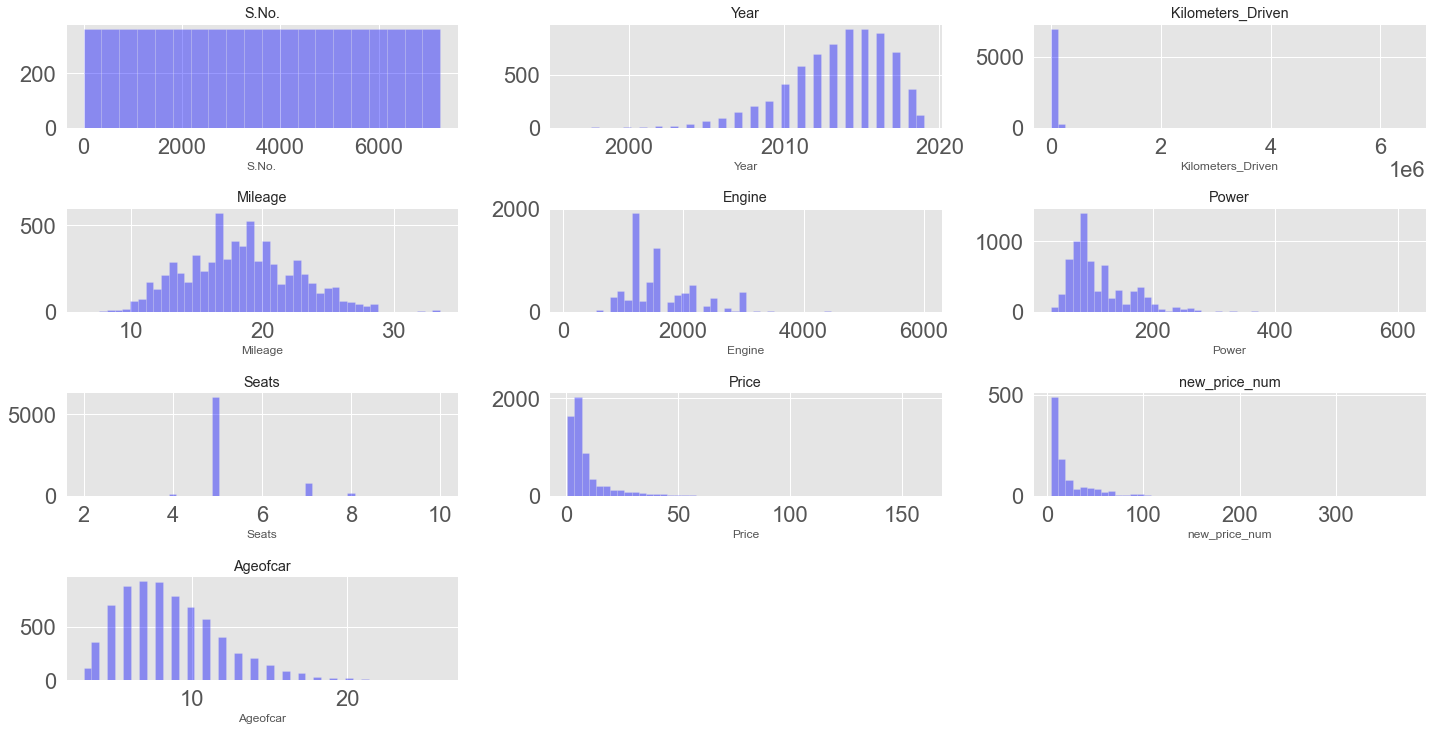

In [219]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
  
- Year is left skewed and has outilers on lower side., This column can be dropped
- Kilometer_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
- Engine ,power and price are  right skewed and has outliers on upper side.
- Age of car is right skewed.


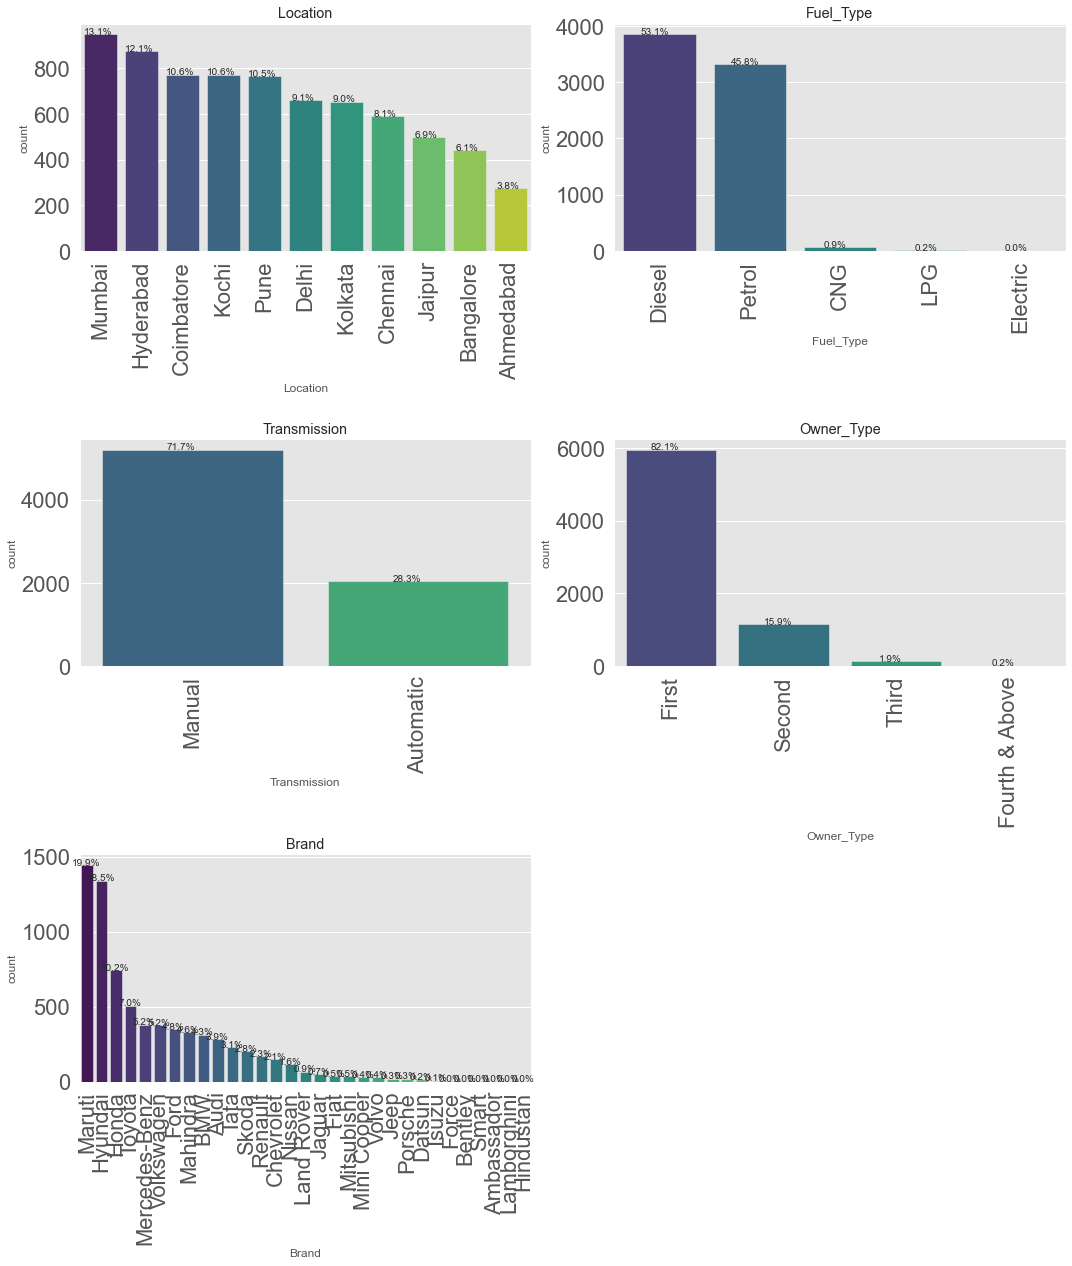

In [220]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)


<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
   
   **Car Profile**
    
-  ~71 % cars available for sell have manual Transmission.
- ~82 % cars are First owned cars.
- ~39% of car available for sale are from  Maruti & Hyundai brands.
-  ~53% of car being sold/avialable for purchase  have fuel type as Diesel .
- Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
- Most of the cars are 5 seaters.
- Car being sold/available for purchase are in  2 - 23 years old
- ~ 71% car are lower price range car.

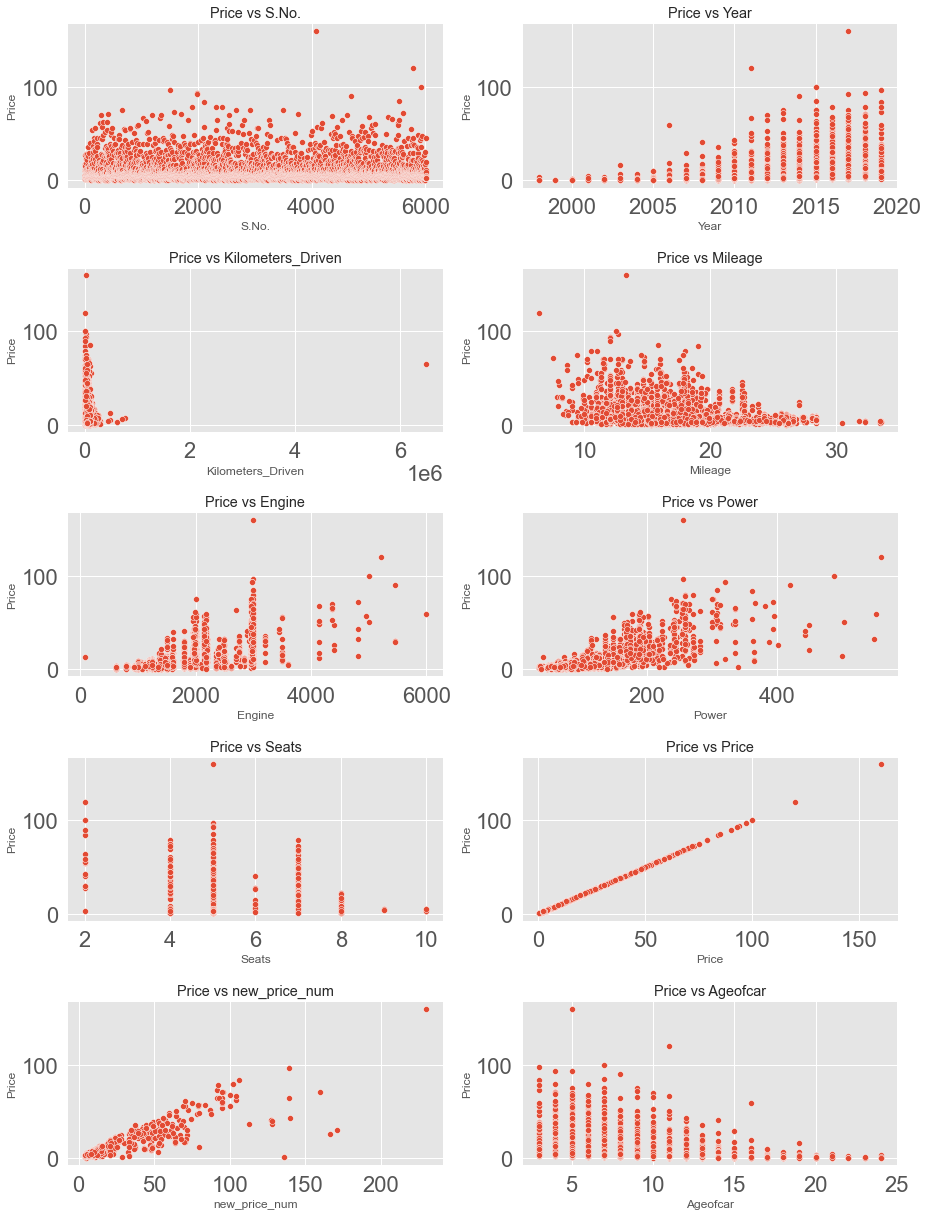

In [221]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

# Handling missing values

In [222]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

### Calculating missing values in each row

In [223]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
dtype: int64

In [224]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


This confirms that certain columns tend to be missing together or all nonmissing together. So will try to fill the missing values , as much as possible.

In [225]:
cars[num_missing==7]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Mahindra,TUV300


In [226]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

We can start filling missing values by grouping  name and year and fill in missing values. with median.

In [227]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)


Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

In [228]:
cars['Engine']=cars.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [229]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      45
Power      162
Mileage     82
dtype: int64

In [230]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

As we can see most of the model have same engine 
size and instead  of just applying median , grouping with model and year that should give more granularity, and near to accurate Engine values.


In [231]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and year to get  more granularity and more accurate Engine and then fillig with median
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))


In [232]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Power']=cars.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [233]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))


In [234]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()


Engine     18
Power      63
Mileage    32
dtype: int64

 There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For  Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [235]:
cars.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

median       mean        max
Model   Year                                 
1000AC  1998  970.00000  970.00000  970.00000
1Series 2013 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
370ZAT  2012 3696.00000 3696.00000 3696.00000
3Series 2018 1995.00000 1995.00000 1995.00000
        2017 1995.00000 1995.00000 1995.00000
        2016 1995.00000 1995.00000 1995.00000
        2015 1995.00000 1995.00000 1995.00000
        2014 1995.00000 2078.16667 2993.00000
        2013 1995.00000 2066.42857 2993.00000

In [236]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

median      mean       max
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 187.74000 181.03333 187.74000
           1968.00000 174.33000 167.12318 187.74000
           1984.00000 207.90000 196.02200 226.60000
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 241.40000 241.74000 246.70000

In [237]:
cars['Seats'].isnull().sum()

54

Grouping with Name should give more granularity, and near to accurate Seat values.

In [238]:
cars['Seats']=cars.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [239]:
cars['Seats'].isnull().sum()

47

Grouping with Model should give more granularity, and near to accurate Seat values.

In [240]:
cars['Seats']=cars.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [241]:
cars['Seats'].isnull().sum()

23

 Lets check which car types have missing values.

In [242]:
cars[cars['Seats'].isnull()==True].head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,2.11000,NaN,12,Maruti,Swift1.3
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,16,Maruti,Swift1.3
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,5.80000,NaN,7,Maruti,Swift1.3
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,3.15000,NaN,11,Maruti,Swift1.3
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.70000,NaN,7,Maruti,Swift1.3
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,15,Maruti,Swift1.3
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50000,1061.00000,NaN,NaN,NaN,1.50000,NaN,14,Maruti,EstiloLXI
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,4.24000,NaN,8,Maruti,Swift1.3
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10000,NaN,NaN,NaN,NaN,2.35000,NaN,16,Maruti,Swift1.3
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00000,NaN,NaN,NaN,NaN,11.99000,NaN,9,Honda,CR-VAT


In [243]:
#most of cars are 5 seater so fillrest of 23 by 5
cars['Seats']=cars['Seats'].fillna(5)

In [244]:
cars['Seats'].isnull().sum()

0

Need to analyse along with price if seats plays any role in price

In [245]:

cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [246]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7252 non-null   int64   
 1   Name               7252 non-null   object  
 2   Location           7252 non-null   category
 3   Year               7252 non-null   int64   
 4   Kilometers_Driven  7252 non-null   int64   
 5   Fuel_Type          7252 non-null   category
 6   Transmission       7252 non-null   category
 7   Owner_Type         7252 non-null   category
 8   Mileage            7220 non-null   float64 
 9   Engine             7234 non-null   float64 
 10  Power              7189 non-null   float64 
 11  Seats              7252 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7252 non-null   int64   
 16  Brand 

# Processing New Price

In [247]:
#For better granualarity grouping has there would be same car model present so filling with a median value brings it more near to real value
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [248]:
cars.new_price_num.isnull().sum()

6138

In [249]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [250]:
cars.new_price_num.isnull().sum()

6019

In [251]:
cars['new_price_num']=cars.groupby(['Brand','Model'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [252]:
cars.new_price_num.isnull().sum()

4578

In [253]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [254]:
cars.drop(['New_Price'],axis=1,inplace=True)

In [255]:
cars.new_price_num.isnull().sum()

158

In [256]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Land Rover      139.00000
Porsche         136.00000
BMW              55.07000
Jaguar           53.72000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.30000
Isuzu            33.68000
Mitsubishi       33.21000
Jeep             22.95000
Toyota           21.08500
Nissan           15.06000
Skoda            14.92250
Ford             11.47500
Renault          11.27000
Volkswagen       10.94000
Mahindra         10.90000
Honda             8.92000
Fiat              8.62500
Hyundai           8.23000
Tata              7.70000
Maruti            7.00000
Datsun            4.98000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [257]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
Price                1233
new_price_num         158
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [258]:

cols1 = ["Power","Mileage","Engine"]

for each in cols1:
    cars[each] = cars[each].fillna(cars[each].median())

In [259]:
#dropping remaining rows
#cannot further fill this rows so dropping them

cars.dropna(inplace=True,axis=0)

In [260]:
cars.isnull().sum()  #No nulll Values

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [261]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,5.29000,12,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,16.06000,7,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,4.50000,8.61000,11,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,6.00000,11.27000,10,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,17.74000,53.14000,9,Audi,A4New


In [262]:
cars.shape

(5892, 17)

Finally done with all missing  values handling

In [263]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,median,mean,max
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,23.50000,25.53771,72.94000
BMW,21.00000,25.24315,93.67000
Bentley,59.00000,59.00000,59.00000
Chevrolet,NaN,NaN,NaN
Datsun,3.10000,3.04923,3.95000
Fiat,2.60000,3.26929,7.71000
Force,NaN,NaN,NaN
Ford,5.34500,6.88940,56.80000


In [264]:
#using business knowledge to create class 
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [265]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [266]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))

In [267]:
cars['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [268]:
cars['Engine']=cars['Engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')

### Univariate, Bivariate & Multivariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Location'>

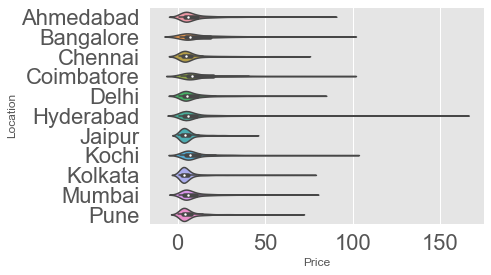

In [269]:
 sns.violinplot(x="Price", y="Location",data=cars)

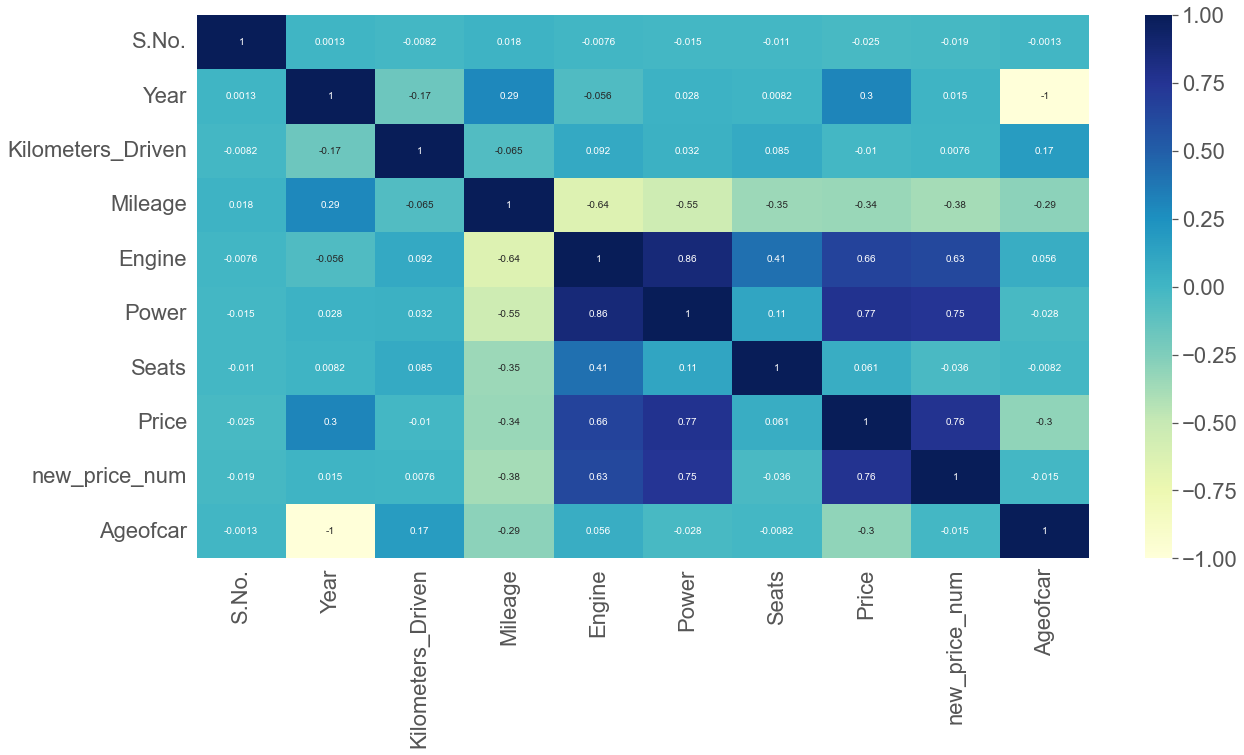

In [270]:
plt.figure(figsize=(20,10))
sns.heatmap(cars.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>

    
- Engine has strong positive correlation to Power [0.86]. 
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative  correlation to age of car.
- Kilometer driven doesnt impact Price


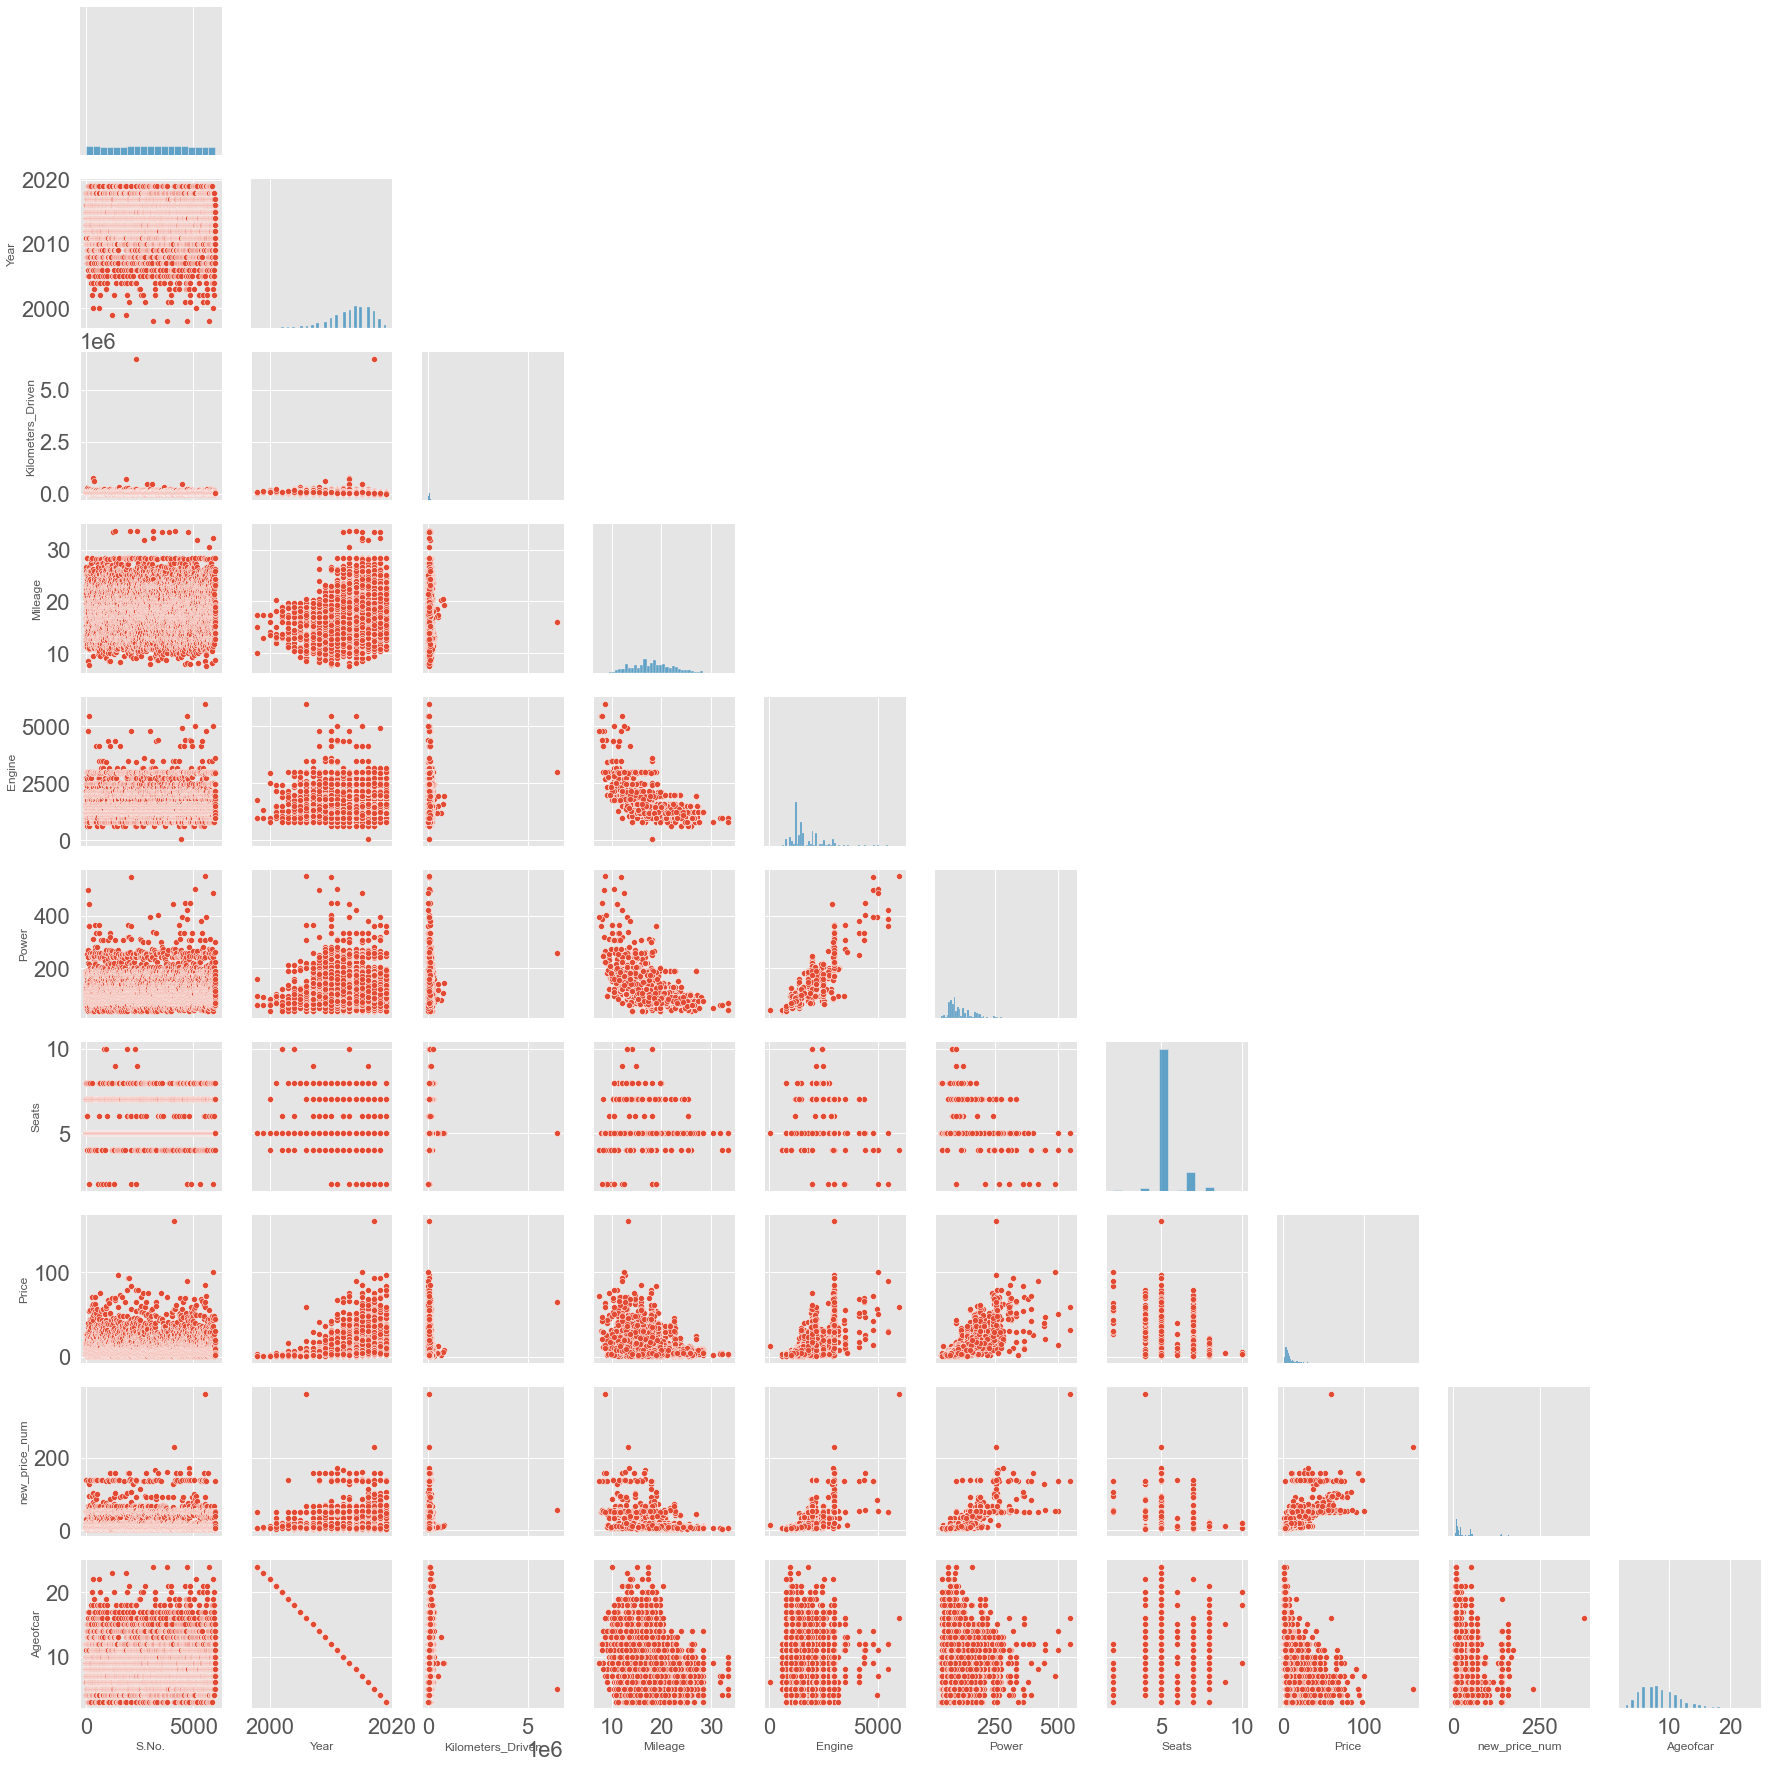

In [271]:
sns.pairplot(data=cars , corner=True)
plt.show()

<p style = "font-size : 15px ; color: blue;font-family:TimesNewRoman">
    <b>Observations</b></p>
    
- Same observation  about correlation as seen in heatmap.

- Kilometer driven  doesnot have impact on  Price . 
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

### Variables that are correlated with Price variable

#### Price  Vs Engine Vs Transmission

<AxesSubplot:title={'center':'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

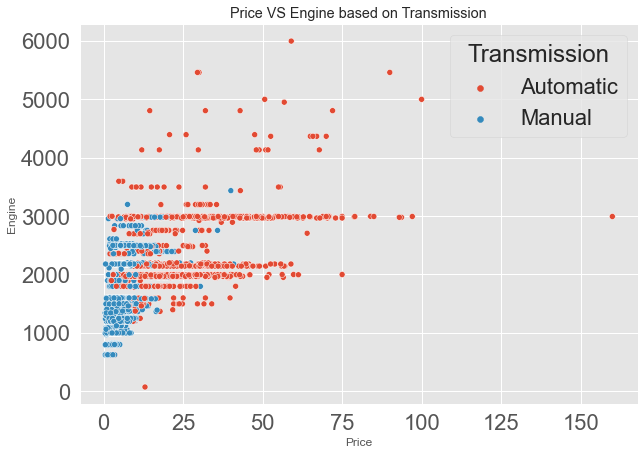

In [272]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

#### Price Vs Power vs Transmission

<AxesSubplot:title={'center':'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

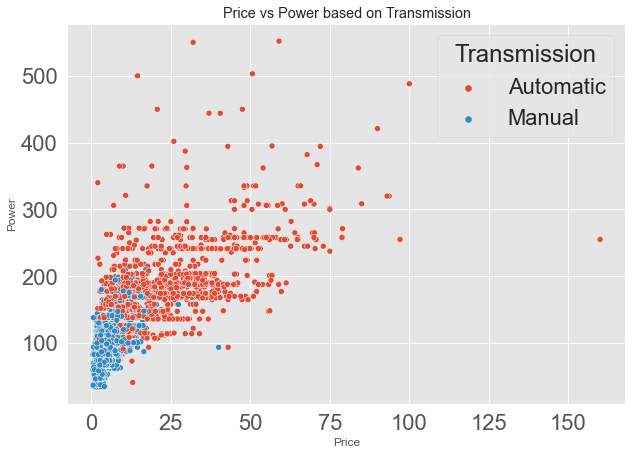

In [273]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

#### Price Vs Mileage Vs Transmission

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

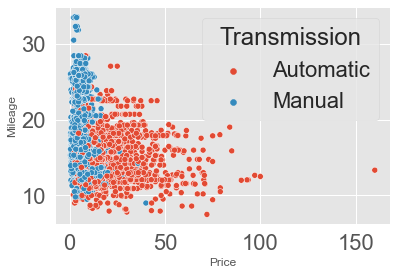

In [274]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

#### Price Vs Year Vs Transmission

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

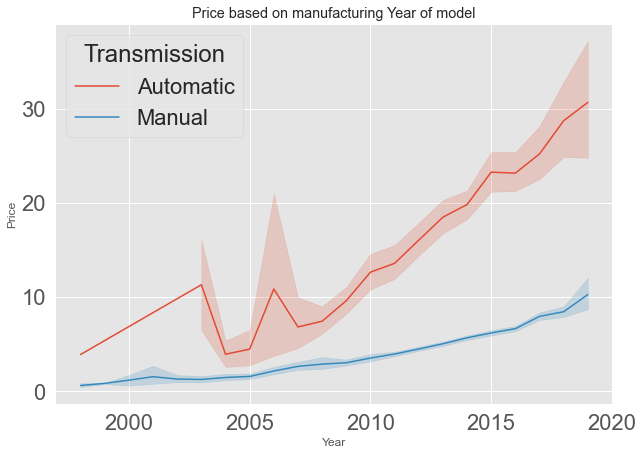

In [275]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=cars)


#### Price Vs Year VS Fuel Type

<AxesSubplot:title={'center':'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

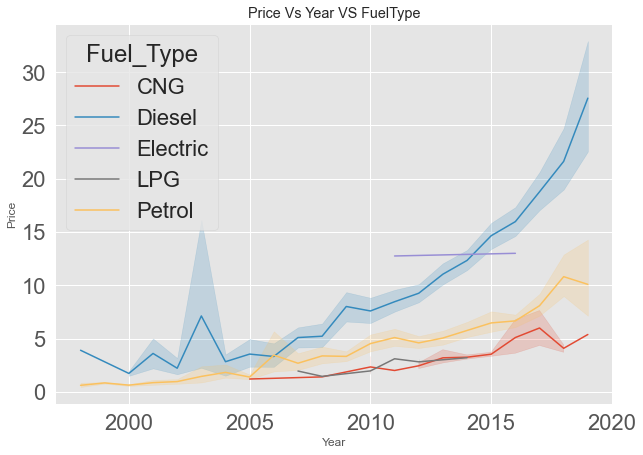

In [276]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

#### Year Vs Price Vs Owner_Type

<AxesSubplot:title={'center':'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

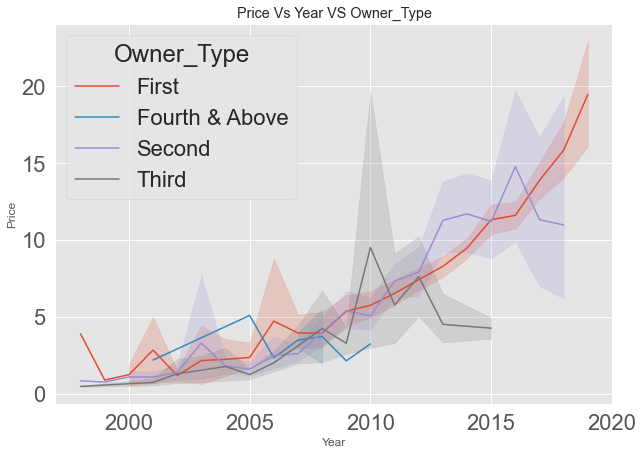

In [277]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=cars)

Need to check the reason for spike in price  for third owner and model in 2010.

In [278]:
cars[(cars["Owner_Type"]=='Third') & (cars["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model,Brand_Class
2978,2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00000,4806,394.30000,4.00000,42.91000,136.00000,12,Porsche,Panamera2010,High
5404,5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48000,1995,177.00000,5.00000,12.00000,67.87000,12,BMW,5Series,High
3293,3293,Toyota Innova 2.5 GX 7 STR,Pune,2010,140000,Diesel,Manual,Third,12.80000,2494,102.00000,7.00000,6.25000,21.08500,12,Toyota,Innova2.5,Low
4962,4962,Mahindra Scorpio VLX,Bangalore,2010,144400,Diesel,Manual,Third,12.05000,2179,120.00000,8.00000,5.25000,10.90000,12,Mahindra,ScorpioVLX,Low
3479,3479,Volkswagen Passat 1.8 TSI MT,Mumbai,2010,60000,Petrol,Manual,Third,14.30000,1798,160.00000,5.00000,3.50000,10.94000,12,Volkswagen,Passat1.8,High
1629,1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.10000,1298,88.20000,5.00000,2.50000,7.00000,12,Maruti,SwiftLxi,Low
5351,5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47000,1198,73.90000,5.00000,2.44000,10.94000,12,Volkswagen,PoloPetrol,High
698,698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.00000,1399,68.00000,5.00000,1.28000,11.47500,12,Ford,FigoDiesel,Low


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

In [279]:
cars.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000
mean,3010.51969,2013.39766,58655.30109,18.32189,1625.08452,113.00404,5.27834,9.59542,19.09573,8.60234
std,1736.06697,3.26869,92128.10804,4.16939,600.79522,53.52478,0.79759,11.17328,22.74291,3.26869
min,0.00000,1998.00000,171.00000,7.50000,72.00000,34.20000,2.00000,0.44000,3.91000,3.00000
25%,1509.75000,2012.00000,33736.75000,15.30000,1198.00000,75.00000,5.00000,3.50000,8.07000,6.00000
50%,3014.50000,2014.00000,53000.00000,18.20000,1493.00000,93.70000,5.00000,5.75000,9.66500,8.00000
75%,4511.25000,2016.00000,72683.25000,21.10000,1984.00000,138.10000,5.00000,10.12000,16.45000,10.00000
max,6017.00000,2019.00000,6500000.00000,33.54000,5998.00000,552.00000,10.00000,160.00000,375.00000,24.00000


#### Price Vs Mileage vs Fuel_type

<AxesSubplot:title={'center':'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

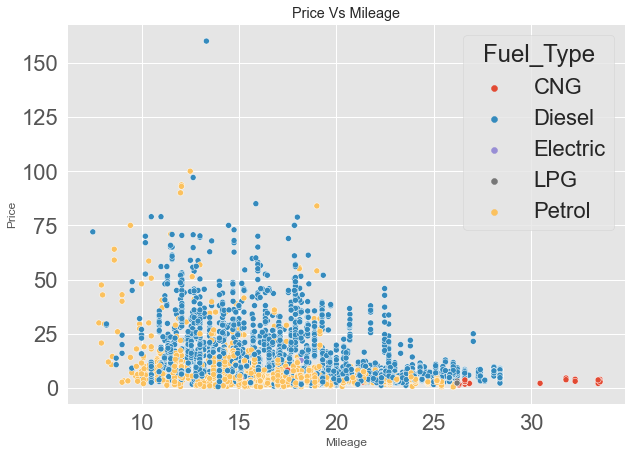

In [280]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

#### Price Vs Seat

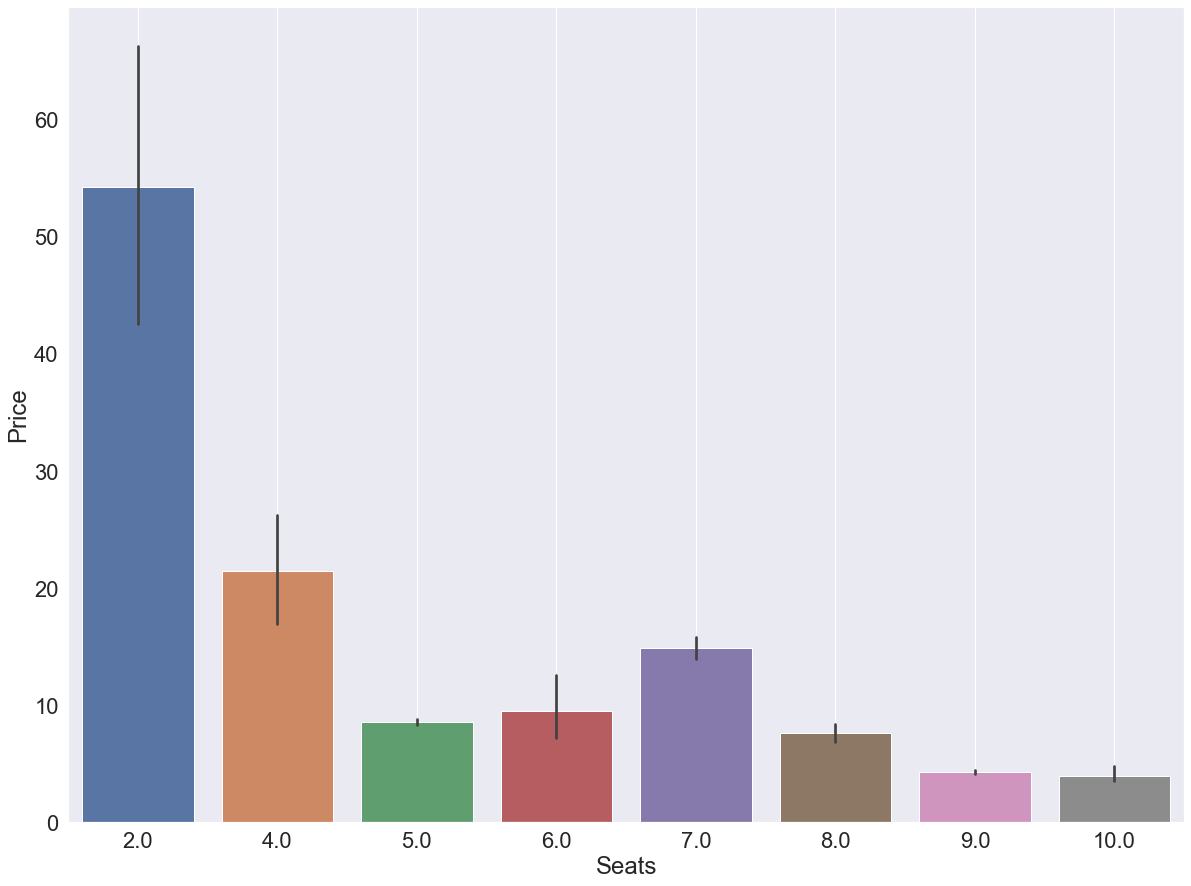

In [281]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

#### Price Vs Location

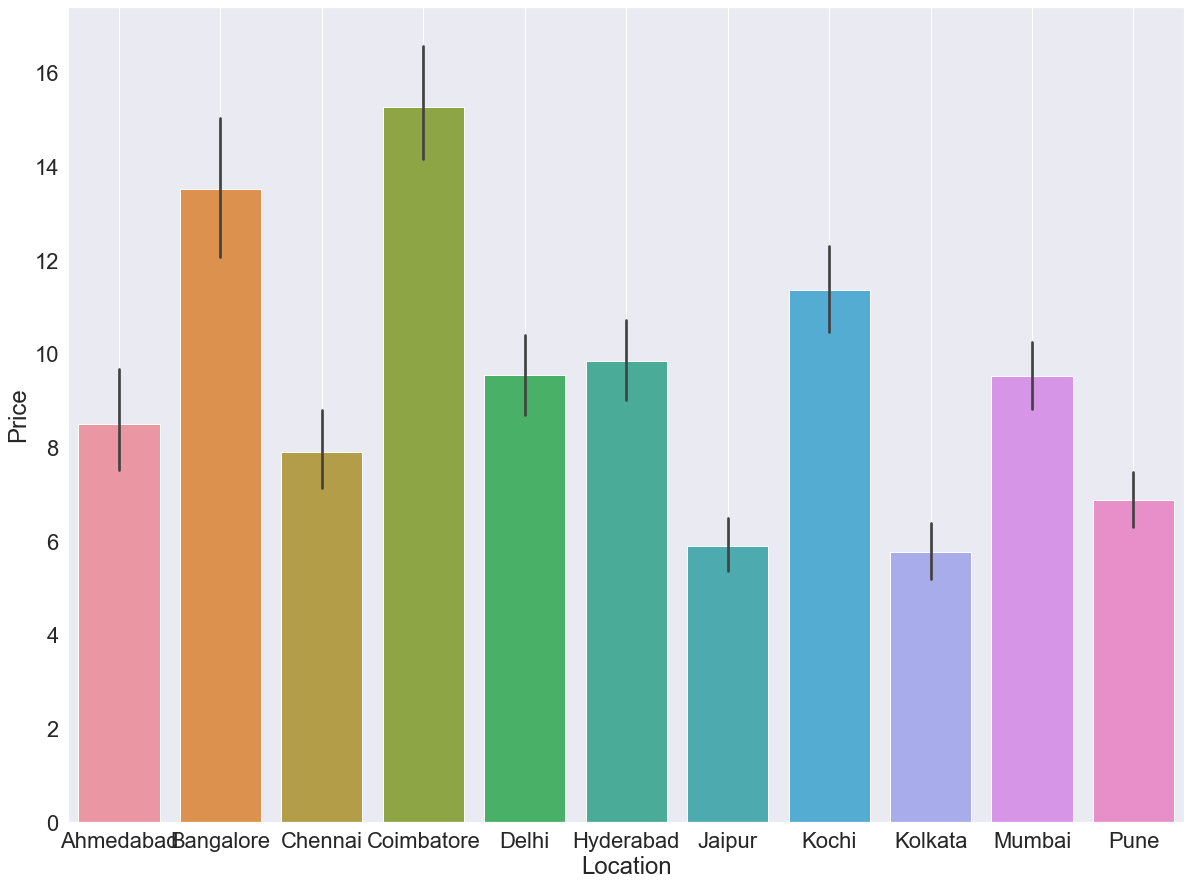

In [282]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

#### Price Vs Brand

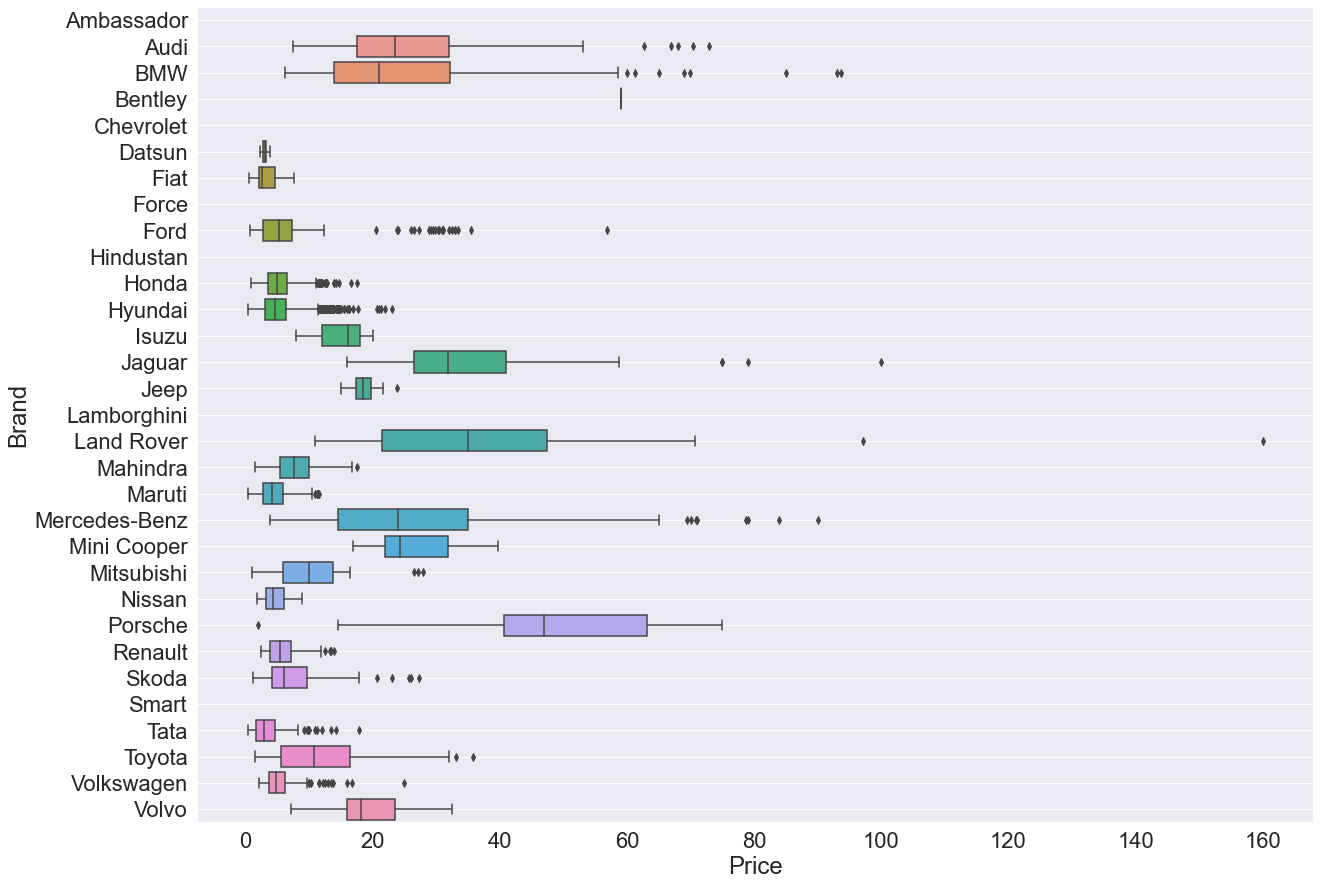

In [283]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

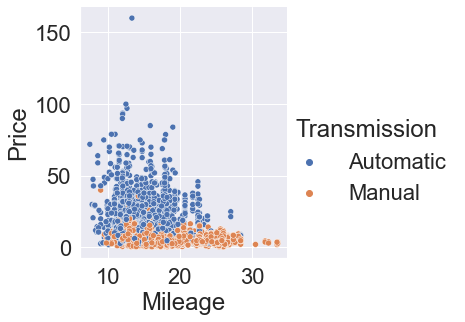

In [284]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5)

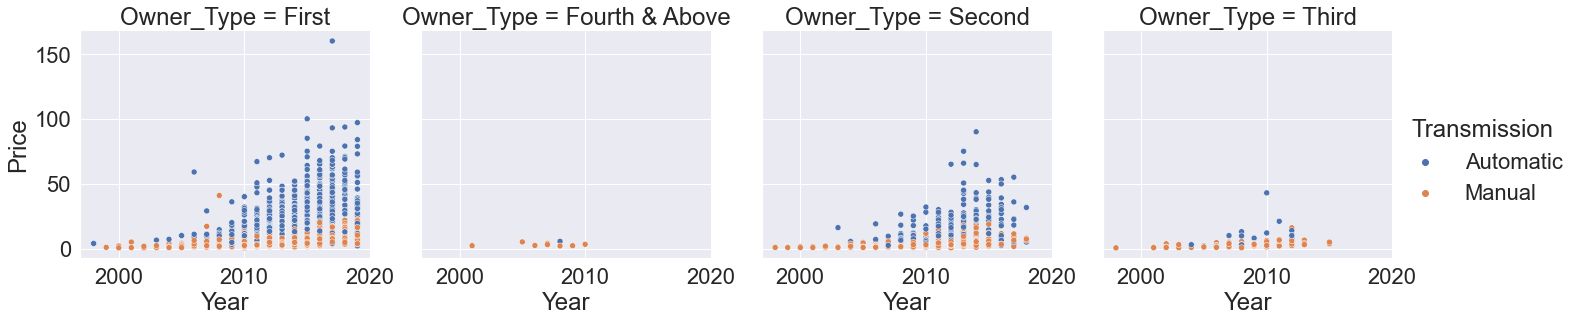

In [285]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

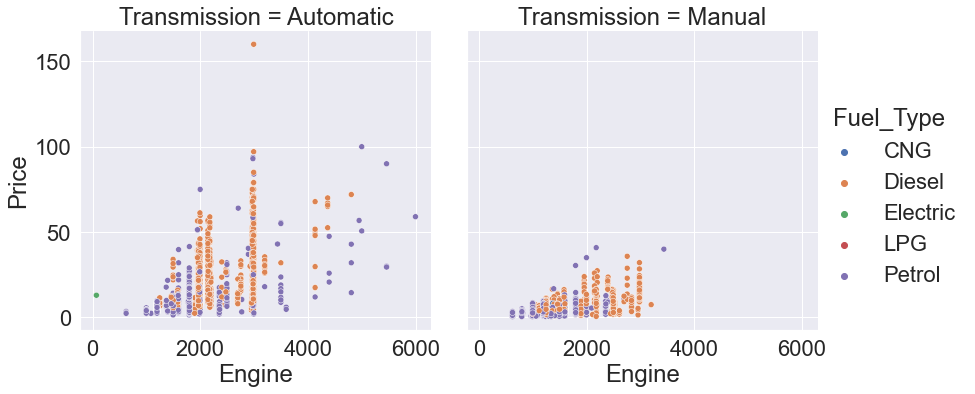

In [286]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

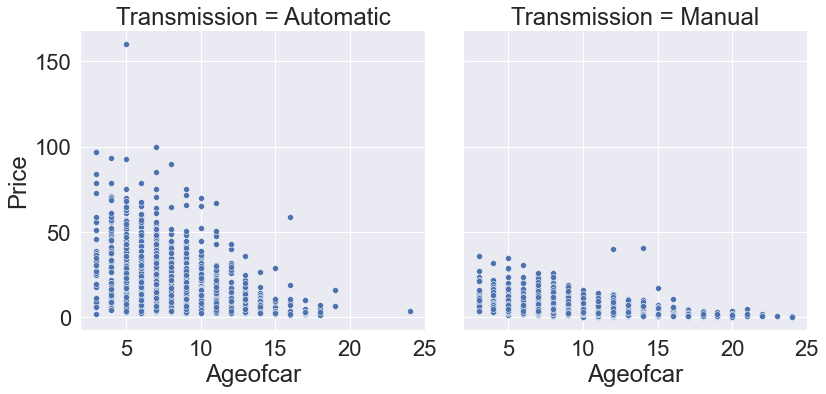

In [287]:

sns.relplot(data=cars, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6)

# Insights based on EDA

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b>
</p>


- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices. 
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models 
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

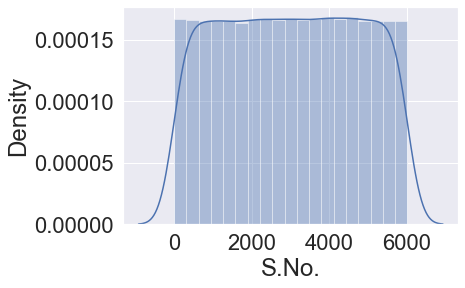

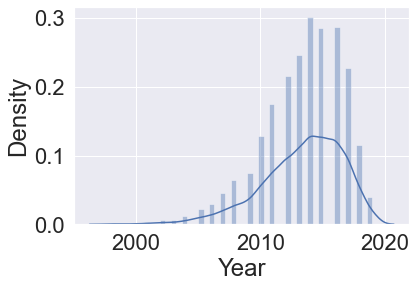

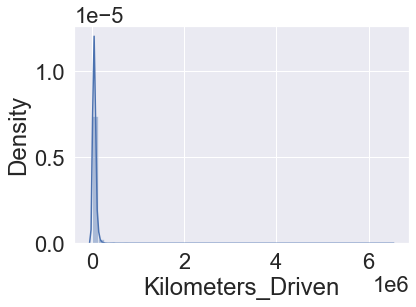

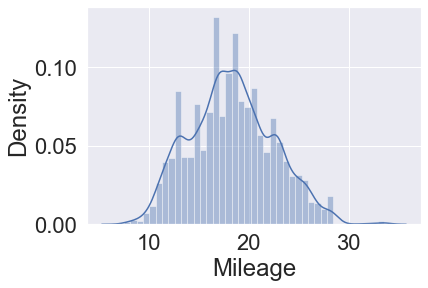

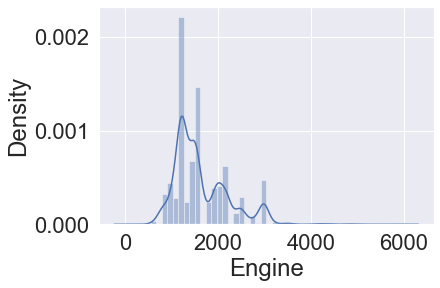

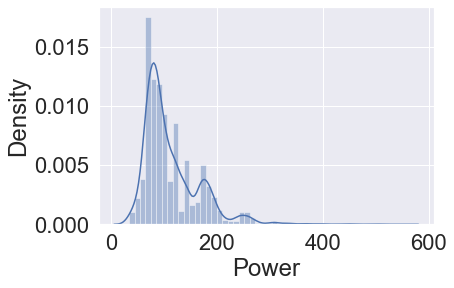

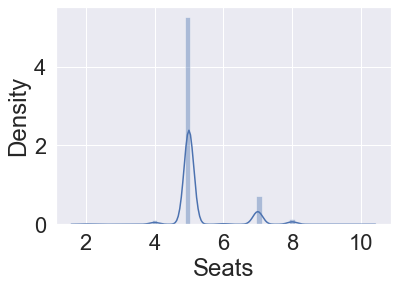

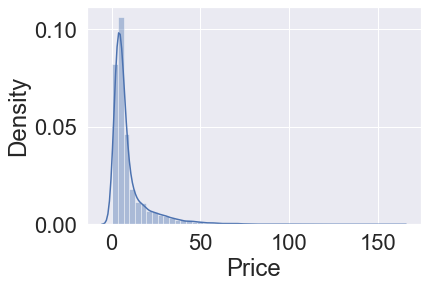

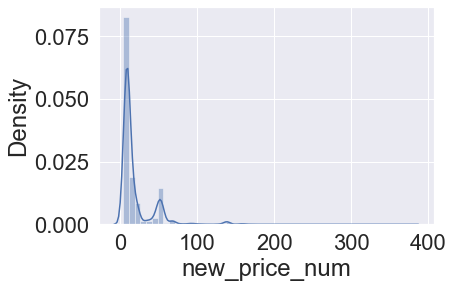

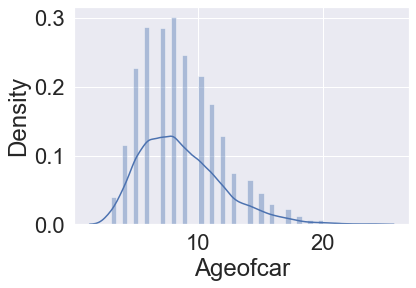

In [288]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

Distrubtions are right skewed , using Log transform can help in normalization

In [289]:

def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [290]:
#This needs to be done before the data is split
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  5892 non-null   int64   
 1   Name                   5892 non-null   object  
 2   Location               5892 non-null   category
 3   Year                   5892 non-null   int64   
 4   Kilometers_Driven      5892 non-null   int64   
 5   Fuel_Type              5892 non-null   category
 6   Transmission           5892 non-null   category
 7   Owner_Type             5892 non-null   category
 8   Mileage                5892 non-null   float64 
 9   Engine                 5892 non-null   int32   
 10  Power                  5892 non-null   float64 
 11  Seats                  5892 non-null   float64 
 12  Price                  5892 non-null   float64 
 13  new_price_num          5892 non-null   float64 
 14  Ageofcar               5892 non-null   i

In [291]:

cars.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [292]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  5892 non-null   int64   
 1   Location               5892 non-null   category
 2   Kilometers_Driven      5892 non-null   int64   
 3   Fuel_Type              5892 non-null   category
 4   Transmission           5892 non-null   category
 5   Owner_Type             5892 non-null   category
 6   Mileage                5892 non-null   float64 
 7   Engine                 5892 non-null   int32   
 8   Power                  5892 non-null   float64 
 9   Seats                  5892 non-null   float64 
 10  Price                  5892 non-null   float64 
 11  Ageofcar               5892 non-null   int64   
 12  Brand_Class            5892 non-null   category
 13  Kilometers_Driven_log  5892 non-null   float64 
 14  Price_log              5892 non-null   f

# Model Building

In [293]:
x= cars.drop([ "Price_log"], axis=1)
y = cars[["Price_log"]]

### Creating dummy variables

In [294]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [295]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
x = encode_cat_vars(x)
x.head()

,S.No.,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar,Kilometers_Driven_log,Location_Bangalore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
0,0,72000,26.60000,998,58.16000,5.00000,1.75000,12,11.18442,0,...,0,0,0,0,0,1,0,0,0,1
1,1,41000,19.67000,1582,126.20000,5.00000,12.50000,7,10.62133,0,...,1,1,0,0,0,1,0,0,0,1
2,2,46000,18.20000,1199,88.70000,5.00000,4.50000,11,10.73640,0,...,0,0,0,0,1,1,0,0,0,1
3,3,87000,20.77000,1248,88.76000,7.00000,6.00000,10,11.37366,0,...,0,1,0,0,0,1,0,0,0,1
4,4,40670,15.20000,1968,140.80000,5.00000,17.74000,9,10.61325,0,...,0,1,0,0,0,0,0,1,0,0


In [296]:
x.columns

Index(['S.No.', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Ageofcar', 'Kilometers_Driven_log', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Class_Low'],
      dtype='object')

In [297]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.reset_index()
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (4124, 28)
x_test: (1768, 28)
y_train: (4124, 1)
y_test: (1768, 1)


In [298]:
#Linear Regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [299]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.06811595394557741


In [300]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.90989769261593


In [301]:
from sklearn import preprocessing
#standard scaling
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)

In [302]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,...,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000,5892.00000
mean,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,...,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,...,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008
min,-1.73425,-0.63487,-2.59578,-2.58527,-1.47242,-4.11068,-0.81947,-1.71409,-7.81986,-0.25169,...,-0.33734,-1.06963,-0.01843,-0.04123,-0.91344,-1.56449,-0.03911,-0.43624,-0.13405,-1.78456
25%,-0.86454,-0.27050,-0.72484,-0.71093,-0.71009,-0.34901,-0.54558,-0.79621,-0.45878,-0.25169,...,-0.33734,-1.06963,-0.01843,-0.04123,-0.91344,-1.56449,-0.03911,-0.43624,-0.13405,0.56036
50%,0.00229,-0.06139,-0.02924,-0.21987,-0.36069,-0.34901,-0.34419,-0.18429,0.17040,-0.25169,...,-0.33734,0.93490,-0.01843,-0.04123,-0.91344,0.63919,-0.03911,-0.43624,-0.13405,0.56036
75%,0.86452,0.15228,0.66637,0.59745,0.46891,-0.34901,0.04695,0.42763,0.61031,-0.25169,...,-0.33734,0.93490,-0.01843,-0.04123,1.09476,0.63919,-0.03911,-0.43624,-0.13405,0.56036
max,1.73192,69.92319,3.65027,7.27916,8.20243,5.92044,13.46223,4.71106,6.86928,3.97320,...,2.96435,0.93490,54.26785,24.25283,1.09476,0.63919,25.56691,2.29233,7.46015,0.56036


In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.06811595394557672
R squared value is: 0.9098976926159309


The R squared value is same,so standard scaling has not done any effect on our data set.

In [304]:
#LASSO
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [305]:
y_pred_lasso=np.round(np.clip(lasso.predict(x_test),1,10)).astype(int)
np.round(1-mean_squared_error(y_test,y_pred_lasso)/y_test.std(),2)

Price_log   0.79000
dtype: float64